# INTRODUCTION
* **In this kernel I ' am going to demonstrate application of some Machine Learning on Heart Disease UCI dataset **
* **This dataset aims to detect whether there is heart attack on patient or not .**
* **We are going to use some visualization tool from : **
* **seaborn**
* **mathplotlib**
* **plotly **
* **and some tools from  scikit  for Machine Learning**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #seaborn
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['heart.csv']


In [2]:
df = pd.read_csv("../input/heart.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

**** *Dataframe Columns and Their Meanings**
* **age**  : age in years
* **sex** : ( 1 = male; 0 = female)
* **cp**  : chest pain type
* **trestbps** : resting blood pressure (in mm Hg on admission to the hospital)
* **chol** :  serum cholestoral in mg/dl
* **fbs** : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* **restecg** :  resting electrocardiographic results
* **thalach**  : maximum heart rate achieved
* **exang** : exercise induced angina (1 = yes; 0 = no)
* **oldpeak** : ST depression induced by exercise relative to rest
* **slope**  : the slope of the peak exercise ST segment
* **ca** : number of major vessels (0-3) colored by flourosopy
* **thal** : 3 = normal; 6 = fixed defect; 7 = reversable defect
* **target**  : 1 or 0**

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.dropna(inplace = True)

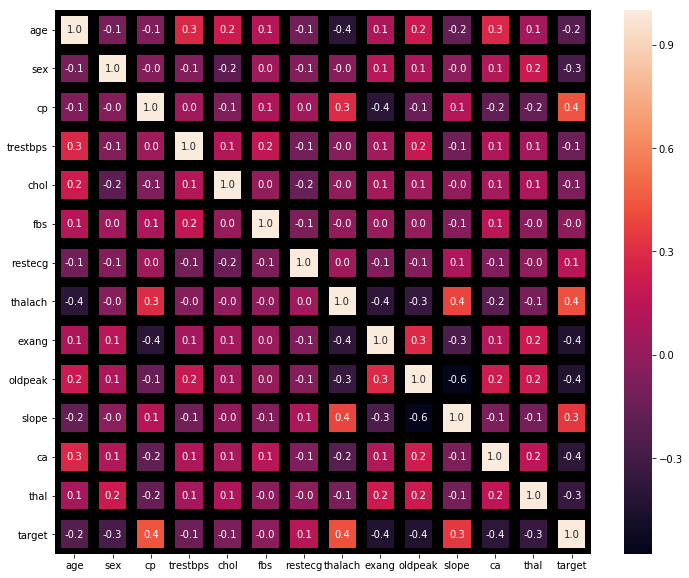

In [8]:
#Correlation Map
f,ax  = plt.subplots( figsize = (12,10))
sns.heatmap(df.corr() , annot = True , linewidth = 10 , linecolor = 'black' , fmt = '.1f' , ax = ax)
plt.show()

**Since there are no strongly correlated elements its better not using linear regression for ML.**

Text(0,0.5,'Count')

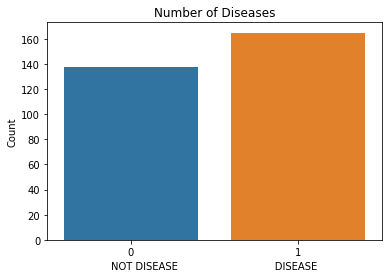

In [9]:
sns.countplot(df.target)
plt.title("Number of Diseases")
plt.xlabel("NOT DISEASE                               DISEASE")
plt.ylabel("Count")



Text(0.5,0,'FEMALE                                      MALE')

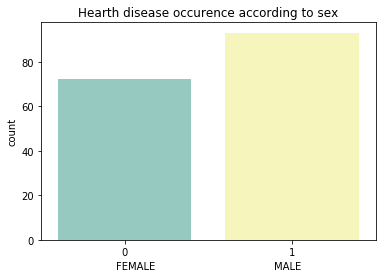

In [10]:
df_disease  = df[df['target'] == 1]

sns.countplot(df_disease.sex,palette="Set3")
plt.title("Hearth disease occurence according to sex")
plt.xlabel("FEMALE                                      MALE")

**We may infer that males are more likely to have an hearth disease than female**

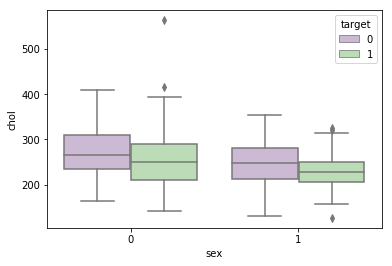

In [11]:
#%% Box Plot
 # Classifaction  
 #sex M = 1 F = 0
 #choloesterol
 #hue = Target 1 is disease , 0 is not disease
 #outlayer can be seen 
 
sns.boxplot(x ="sex", y = "chol" , hue = "target" , data  = df , palette = "PRGn")
plt.show()




* **#1 is Male 0 is female. Target is 1 means there is disease . Target is 0 means there is no disease .**
* **Having a higher chololesterol may not lead to having a hearth disease with respect to our data . **
* **And females  are more likely to have higher cholesterol than male.**

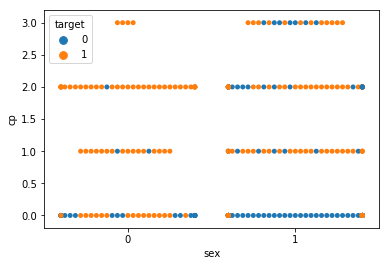

In [12]:
#%% Swarmn Plot 
#FOR CLASSIFICATION
sns.swarmplot (x= "sex", y ="cp" , hue = "target" ,data = df )


* **Males with no chest pain more likely to have no heart disease **
* **Females may not have  chest pain eventough they have an heart disease**
* **People with chest pain are more likely to have an heart disease**
* **Some males may have an chest pain eventough they do not have an heart disease**

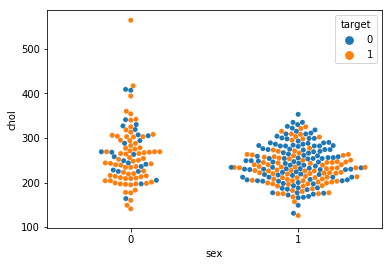

In [13]:
#FOR CLASSIFICATION
sns.swarmplot (x= "sex", y ="chol" , hue = "target" ,data = df )

* **Mostly we can infer that if a woman has an high cholesterol , she more likely to have an heart disease**
* **For males , its hard to classify whether they have a heart disease or not**

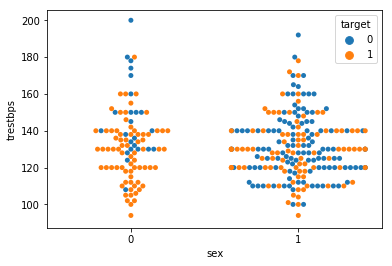

In [14]:
#FOR CLASSIFICATION
sns.swarmplot (x= "sex", y ="trestbps" , hue = "target" ,data = df )

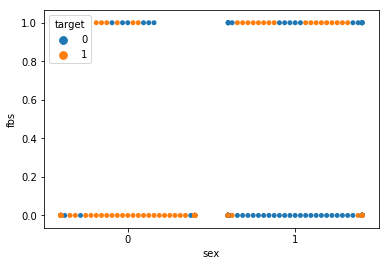

In [15]:
sns.swarmplot(x = "sex" , y ="fbs", hue ="target", data = df )

* **fbs** : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* **For female we can say that fasting blood sugar is not a good property to undestand the hearth disease since female may have an heart disease eventough they do not have blood sugar**
* **For males who have high fasting blood sugar are more likely to have an heart disease**

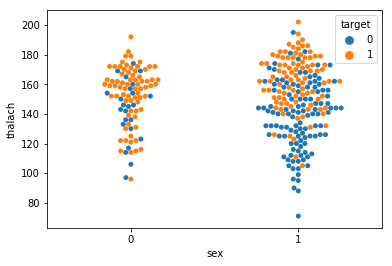

In [16]:
sns.swarmplot(x = "sex" , y ="thalach", hue ="target", data = df )

In [17]:
df_male = df[df["sex"] == 1]
df_female =df[df["sex"] == 0]

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


<Figure size 800x640 with 0 Axes>

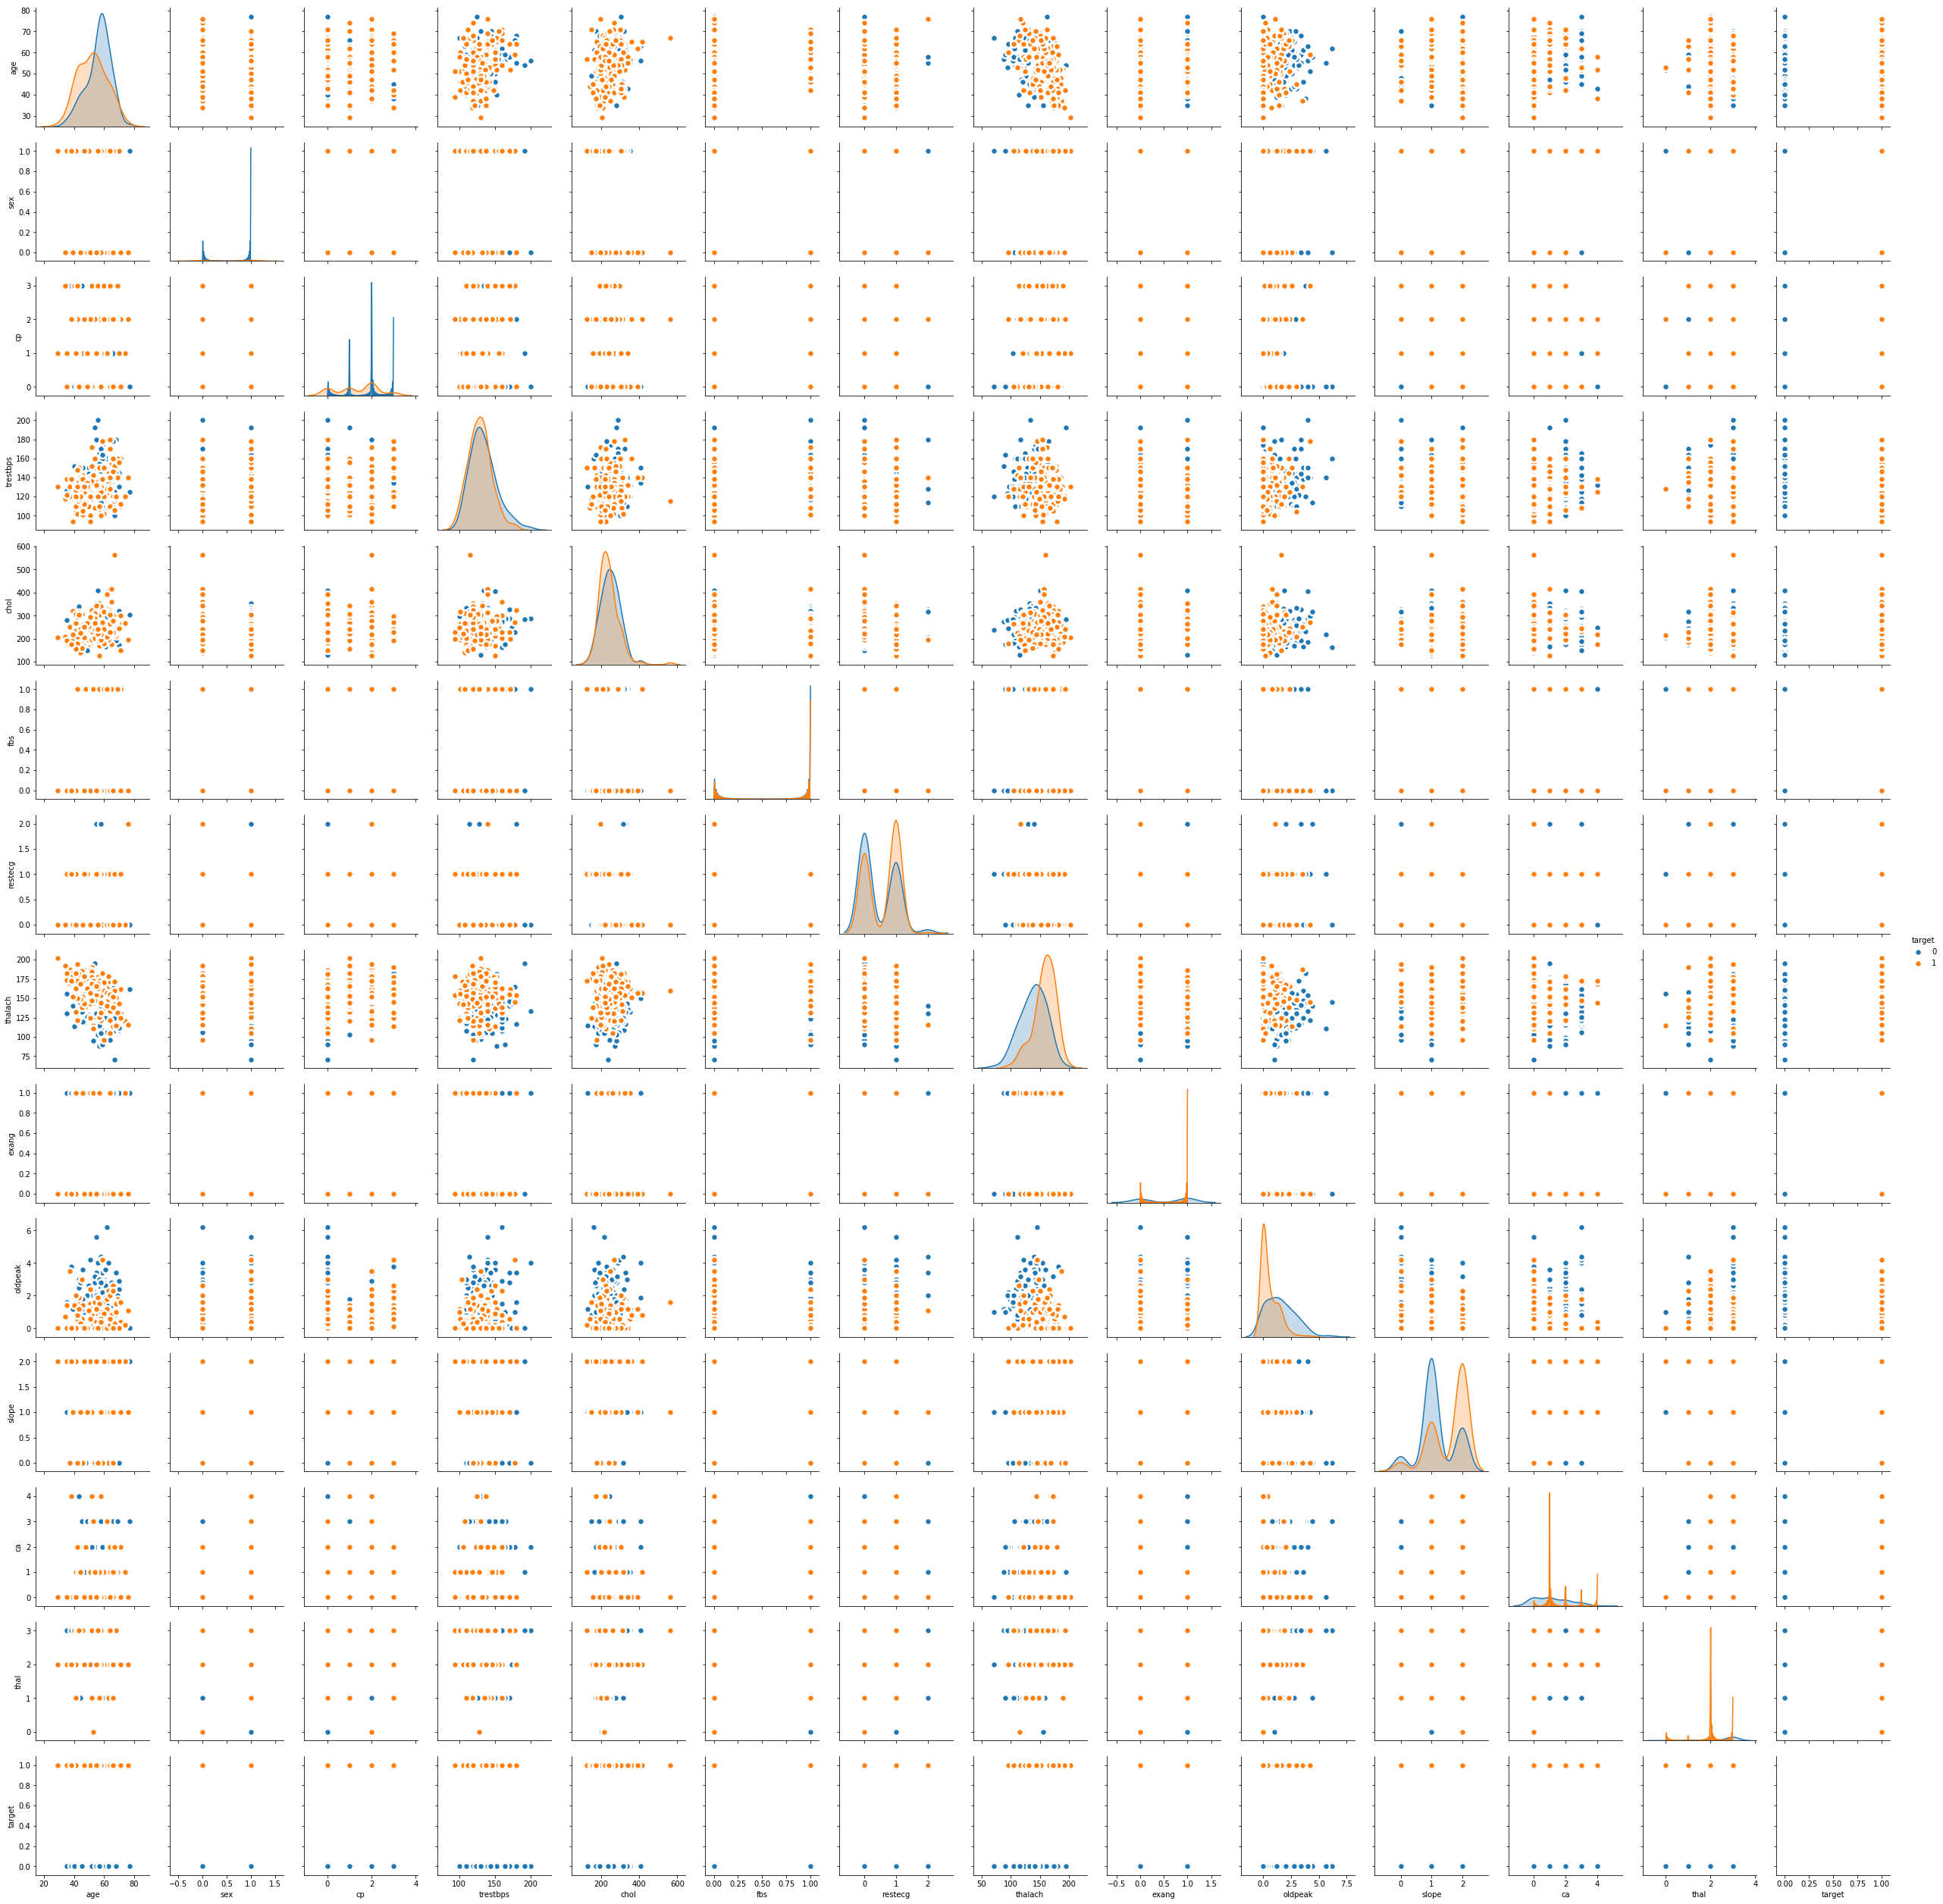

In [18]:
# Pair Plot
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df, kind="scatter", hue="target", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


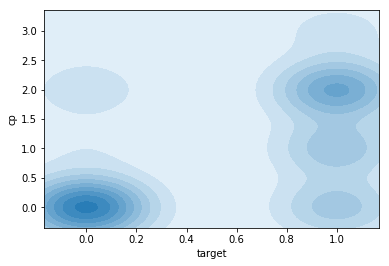

In [19]:
#%% Kde Plot # 

sns.kdeplot(df.target ,df.cp , shade =True ,cut = 1)


**It can be concluded from KDE plot that people with heart disease are more likely to have a chest pain in type 2 and 
people who do not have heart disease are more likely to not have a chest pain**

In [20]:
df.head(5)
df_FV = df_disease[["trestbps","chol","thalach"]]

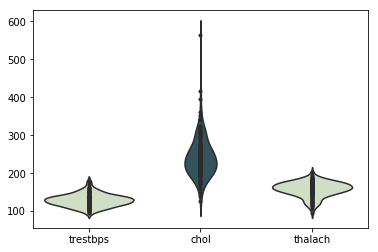

In [21]:
#%% Violin Plot  

#Distribution of trestbps , chol , thalach in patients who HAVE Heart disease

# Show each distribution with both violins and points
pal = sns.cubehelix_palette(2, rot=-.5, dark=.3)
sns.violinplot(data=df_FV, palette=pal, inner="points") 

plt.show()


* **In this violin plot I have select the people who have a heart disease **
* **Distribution of trestbps , chol and thalach can be seen in this figure**

In [22]:
data2 = df_disease[["restecg","exang","oldpeak","thal","slope"]]

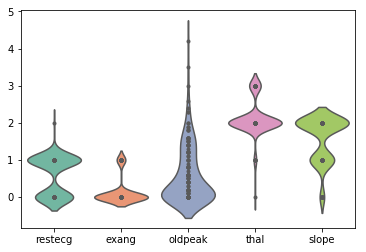

In [23]:
ax = sns.violinplot(data=data2, palette="Set2", inner="points",scale="width",split = True) 

plt.show()

**** *Dataframe Columns and Their Meanings**
* **restecg** :  resting electrocardiographic results
* **exang** : exercise induced angina (1 = yes; 0 = no)
* **oldpeak** : ST depression induced by exercise relative to rest
* **slope**  : the slope of the peak exercise ST segment
* **ca** : number of major vessels (0-3) colored by flourosopy
* **thal** : 3 = normal; 6 = fixed defect; 7 = reversable defect


In [24]:
df_2 = df.drop(['age','sex'],axis =1)

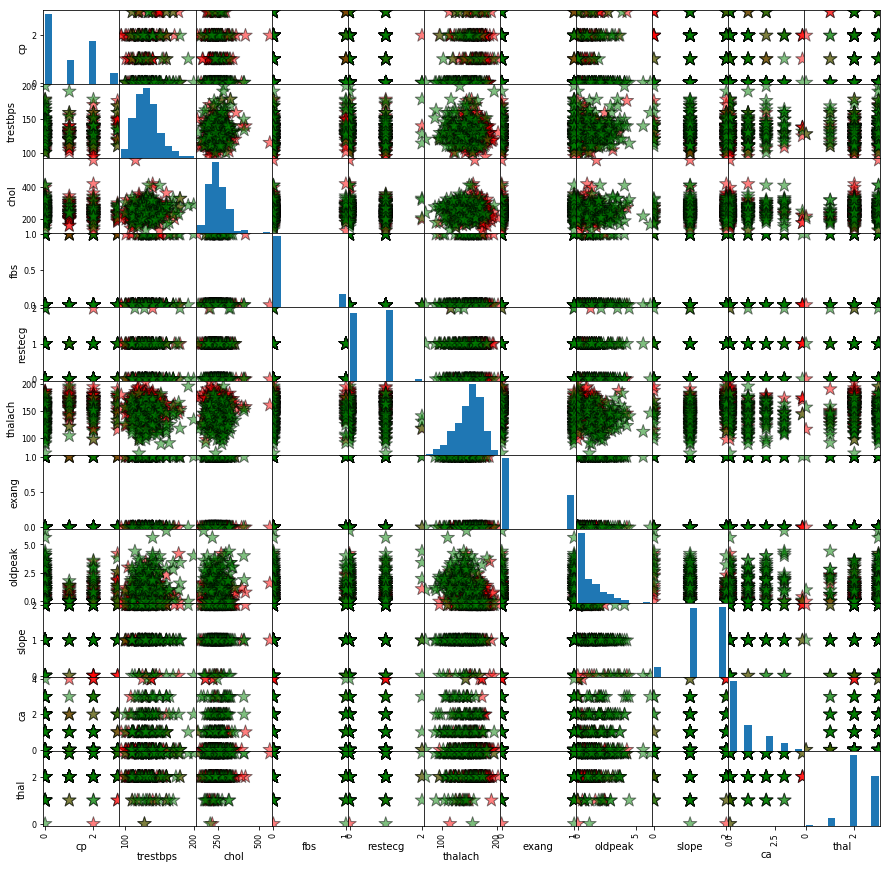

In [25]:
color_list = ['red' if i== 1 else 'green' for i in df_2.loc[:,'target']]
pd.plotting.scatter_matrix(df_2.loc[:, df_2.columns != 'target'],
                                       c=color_list,
                                       figsize= [15,15],
                                       diagonal='hist',
                                       alpha=0.5,
                                       s = 200,
                                       marker = '*',
                                       edgecolor= "black")
plt.show()

**INTRODUCTION TO MACHINE LEARNING**


    * **LOGISTIC REGRESSION
* **Logistic regression is a widely known machine learning technique which is mostly used for CLASSIFICATION**
* **Logistic regression gives best solution ,when our dependent variable is binary in this case its 'target' .**
* **We may have more than 1 independent variable which will used for predicting our dependent variable **
* **Independent variables may be in form of binary or interval**
* **Sometimes we may need normalize and scale our inputs for getting better result in terms of predicting**


In [26]:
x_data = df.drop(['target'],axis = 1)

In [27]:
y = df.target.values

In [28]:
# %% normalization
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data)).values


**We normalized our data in order to make all features balanced . In other words , We do not want 1 feauture dominate all other feautures .****

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

* **By using sklearn liblary , we are dividing our data . 20 percent of the data will be used for testing our model. **
* **%80 percent of the data will be used for training our model**

In [30]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
print("test accuracy of LogisticRegression Model is  {}".format(lr.score(x_test,y_test)))



test accuracy of LogisticRegression Model is  0.8524590163934426


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


**KNN ( K Nearest Neighbours)**
* KNN is a machine learning algorithm which is widely used for classification .
* Main aims of this algorithm is finding k nearest data to the point which is going to be classified .
* By looking it's neighbours, algorithm decides to put data into which class .
![](http://)<br>
<br>
<br>
<br>
 <img src="https://dslytics.files.wordpress.com/2017/11/knn.png" width="400px">
 <br>
 <br>
*  In this picture k is chosen 3 .
*  Star is the point to be classified
*  X1, X2 ara properties of data .
*  Since 2 of the 3 nearest neighbours are class B , star will be classified as class B.

In [31]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
#x,y = df.loc[:,df.columns != 'target'], df.loc[:,'target']
knn.fit(x,y)
prediction = knn.predict(x)
print('Prediction: {}'.format(prediction))


Prediction: [1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1]


In [32]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 42)

#%% KNN Classifier 
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
#print('Prediction: {}'.format(prediction))
print('With KNN (K=5) accuracy is: ',knn.score(x_test,y_test)) # accuracy

With KNN (K=5) accuracy is:  0.7802197802197802


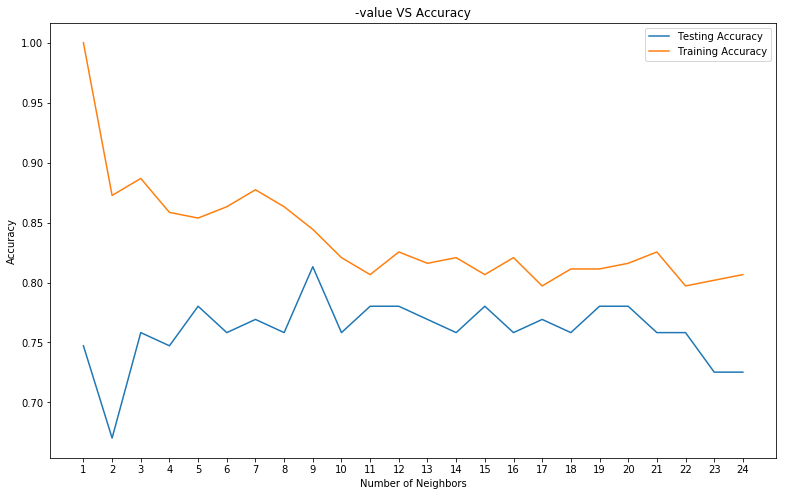

Best accuracy is 0.8131868131868132 with K = 9


In [33]:
# Model complexity
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(neig):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test, y_test))

# Plot
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

**#DECISION TREE**
* Decision Tree(CART ) is also known as Classification and Regressiion Trees.
* In this data we are going to use for classification
* **ADVANTAGES OF USING DECISION TREES**
* Its easy to use and implement
* Not needed too much data prepearing
* It looks like its similar to human thinking form 
* Categorical data can be used 
* **EXAMPLE**
 <img src="https://s3-ap-southeast-1.amazonaws.com/he-public-data/Fig%201-18e1a01b.png" width="500px">

In [34]:

# %% train test split
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size = 0.20,random_state = 42)


In [35]:
#%% decision tree

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

print("decision tree score: ", dt.score(x_test,y_test))



decision tree score:  0.8032786885245902


* **#Random forest**
<br>
<br>
* **Randomis simple , flexible machine learning algorith which is widely used for both classification and regression **
* **Basically it consists of many decision trees **
* **The final results depend upon the results of these decision trees**
<img src="https://cdn-images-1.medium.com/max/1600/1*i0o8mjFfCn-uD79-F1Cqkw.png" width="500px">


In [36]:
#%%  random forest
# %%
# %% train test split
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size = 0.20,random_state = 42)


from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100,random_state = 1)
rf.fit(x_train,y_train)
print("random forest algorithm result: ",rf.score(x_test,y_test))

random forest algorithm result:  0.8524590163934426


**SUPPORT VECTOR MACHINE **
* SVM is an machine learning algorithm which is used for both classification and regression .
* Main aim of SVM is finding the hypherplane which is the farthest from support vectors and separates the classes
* In this picture the middle hyperplane should be chosen 
<img src="https://www.analyticsvidhya.com/wp-content/uploads/2014/10/xyplot1.png" width="500px">

In [37]:
#%%SVC Code and accuracy 
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=42)
 # %% SVM
 
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(x_train,y_train)
 
# %% test
print("print accuracy of svm algo: ",svm.score(x_test,y_test))



print accuracy of svm algo:  0.8461538461538461


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


* **NAIVE BAYES ALGORITHM**
<br>
<br>
<br>
<br>
<br>
* In this Algorithm , Bayes theorem of probability is used to predict the class of unknown data set.her
* Bayes Theorem assumes , all properties that we used for deciding are independent of each other
<img src="http://uc-r.github.io/public/images/analytics/naive_bayes/naive_bayes_icon.png" width="500px">
<br>
<br>
<br>
<br>
* P(c|x) is the posterior probability of class (c, target) given predictor (x, attributes).
* P(c) is the prior probability of class.
* P(x|c) is the likelihood which is the probability of predictor given class.
* P(x) is the prior probability of predictor.
For further Information you can check  the source website<a href = "https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/">

In [38]:
# %%Naive Bayes Application
# %% train test split
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size = 0.20,random_state = 42)

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
 
# %% test
print("print accuracy of naive bayes algo: ",nb.score(x_test,y_test))
 

print accuracy of naive bayes algo:  0.8688524590163934


# Algorithm Performance 
* For understanding algorithm's performance **CONFUSION MATRIX** can be used .
* Confusion matrix is a matrix which show how did the algorithm classified the data . 
* For example ,  lets think we are making binary classification . 
* There are 4 possibilities. Firstly , 
* 1) We can classifty actual true data as true (True positvie)
* 2) We can also classify actual true data as false in other words we can classify 1 as 0 (False Positive)
* 3)We can classify actual false data as True .(False Negative)
* 4) We can classify actual false data as False(True Negative )
<img src="https://cdn-images-1.medium.com/max/1600/1*Z54JgbS4DUwWSknhDCvNTQ.png" width="500px">


In [39]:
# %%
# %% train test split
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size = 0.20,random_state = 42)


#%%  random forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100,random_state = 42)
rf.fit(x_train,y_train)
print("random forest algo result: ",rf.score(x_test,y_test))


random forest algo result:  0.8360655737704918


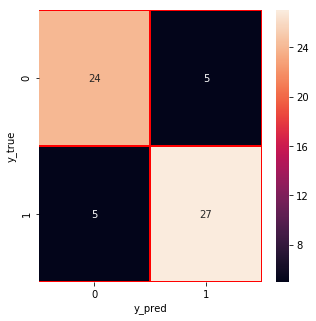

In [40]:

##CONFUSION MATRIX FOR RANDOM FOREST MODEL
y_pred = rf.predict(x_test)
y_true = y_test
#%% confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true,y_pred)


# %% cm visualization
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# Cross Validation
* Score of the Machine Learning technique also depends on the how did train and test data are split . 
* Since the data split randomly , we can confront with extraordinary good or bad results than the actual data will give.
* In order to eliminate this inconsistency , the technique called **'K Fold cross validation is used '**
<br>
Train data is split into K part . 
In each iteration ,1 part of the splitted dat is used as test data and the other parts are used as train data. Then we find test accuracy for this split.
At the end we have ,  K many test accuracy result . 
At the end , we take avarege of these results and get the final test accuracy.
By using these techinque , we are eliminating unexpected result of random distribution .

<img src="https://cdn-images-1.medium.com/max/1600/1*me-aJdjnt3ivwAurYkB7PA.png" width="500px">

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train, y_test = train_test_split(x,y,test_size = 0.3)

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [43]:
#K fold CV K = 10
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = knn , X = x_train , y = y_train , cv = 10)
print("avarege accuracy : " ,np.mean(accuracies))
print("average std" ,np.std(accuracies))

avarege accuracy :  0.825151515151515
average std 0.07480951616907253


In [44]:
knn.fit(x_train,y_train)
print("test accuracy: ",knn.score(x_test,y_test))

test accuracy:  0.7912087912087912


# Grid Search Method

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
# %% grid search cross validation for knn

from sklearn.model_selection import GridSearchCV

grid = {"n_neighbors":np.arange(1,50)}
knn= KNeighborsClassifier()

knn_cv = GridSearchCV(knn, grid, cv = 10)  # GridSearchCV
knn_cv.fit(x,y)

#%% print hyperparameter KNN algoritmasindaki K degeri
print("tuned hyperparameter K: ",knn_cv.best_params_)
print("tuned best score: ",knn_cv.best_score_)

tuned hyperparameter K:  {'n_neighbors': 8}
tuned best score:  0.8250825082508251


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [47]:
# STARTING FROM BEGINNING
x_data = df.drop(['target'],axis = 1) # We drop target for train and test data
y = df.target.values # y is our target where there is disease and not 

#NORMALIZATION of x 
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data)).values

#We split our data as test and train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

#We fit our data
knn.fit(x_train,y_train)
lr.fit(x_train,y_train)
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)
svm.fit(x_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=1,
  shrinking=True, tol=0.001, verbose=False)

In [48]:
x_axis  = ['logistic regression', 'knn' , 'decision_tree' , 'random_forest' , 'support_vector_machine', ]
y_results =[lr.score(x_test,y_test),knn.score(x_test,y_test),dt.score(x_test,y_test),rf.score(x_test,y_test),svm.score(x_test,y_test)]

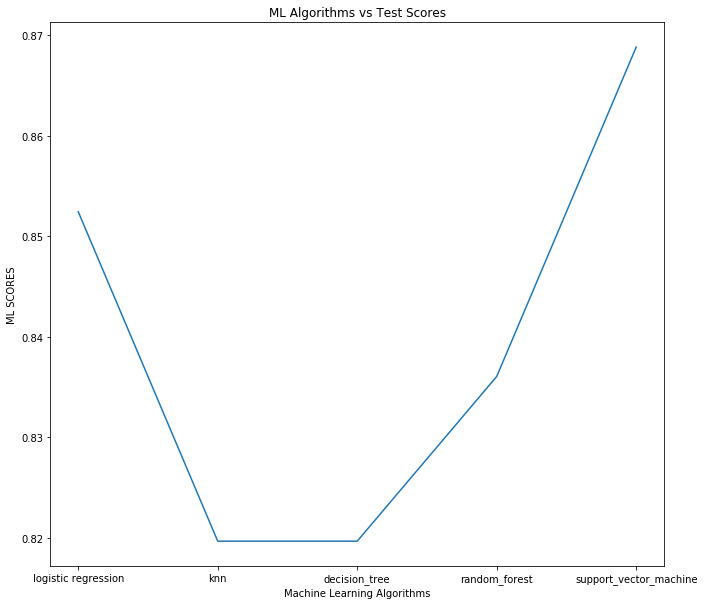

In [49]:
plt.figure(figsize=(11,10))
plt.xlabel("Machine Learning Algorithms")
plt.ylabel("ML SCORES")
plt.title("ML Algorithms vs Test Scores")
plt.plot(x_axis ,y_results)


In [50]:
y_results

[0.8524590163934426,
 0.819672131147541,
 0.819672131147541,
 0.8360655737704918,
 0.8688524590163934]

# CONCLUSION 
<br>
* The highest score is found by SVM with 0.868
* The worst score is foundy by Decision Tree with 0.803
* As we can see some ML learning algorithm gives better results than other algorithms . 
* But we can not say the best ML algorithm is  x algorithm . 
* Because for another dataset, decision_tree may give higher results than SVM .
<br>
<br>
* ** Sınce I am begiiner , I would appreciate if you give feedbacks in comment section. :)**
* ** THANKS FOR READING TILL HERE**
 <br>
 <br>
* For more information you can check the links that I used for preparing these kernels. 
* https://www.kaggle.com/kanncaa1/machine-learning-tutorial-for-beginners
* Confusion Matrix : https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62
* Naive Bayes  : https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained
* SVM : https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/
* Random Forest : https://towardsdatascience.com/the-random-forest-algorithm-d457d499ffcd
* Decision Tree : https://medium.com/deep-math-machine-learning-ai/chapter-4-decision-trees-algorithms-b93975f7a1f1
* 
